In [1]:

## Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/content/drive/MyDrive/framingham.csv')
# print top 5 rows of the dataset
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
# Checking for null values
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [4]:
df=data.fillna(0)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,0.0,0


In [5]:
# Again Checking for null values
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [6]:
df.shape


(4238, 16)

In [7]:
# Getting some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [8]:
# Statistical information about the data
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.929920,0.494101,8.941482,0.029259,0.005899,0.310524,0.025720,233.928740,132.352407,82.893464,25.686331,75.861019,74.462482,0.151958
std,0.495022,8.572160,1.053018,0.500024,11.902399,0.168552,0.076587,0.462763,0.158316,51.169478,22.038097,11.910850,4.420935,12.081533,32.869879,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.500000,48.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,117.000000,75.000000,23.050000,68.000000,68.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,128.000000,82.000000,25.380000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efcbf775b10>,
      dtype=object)

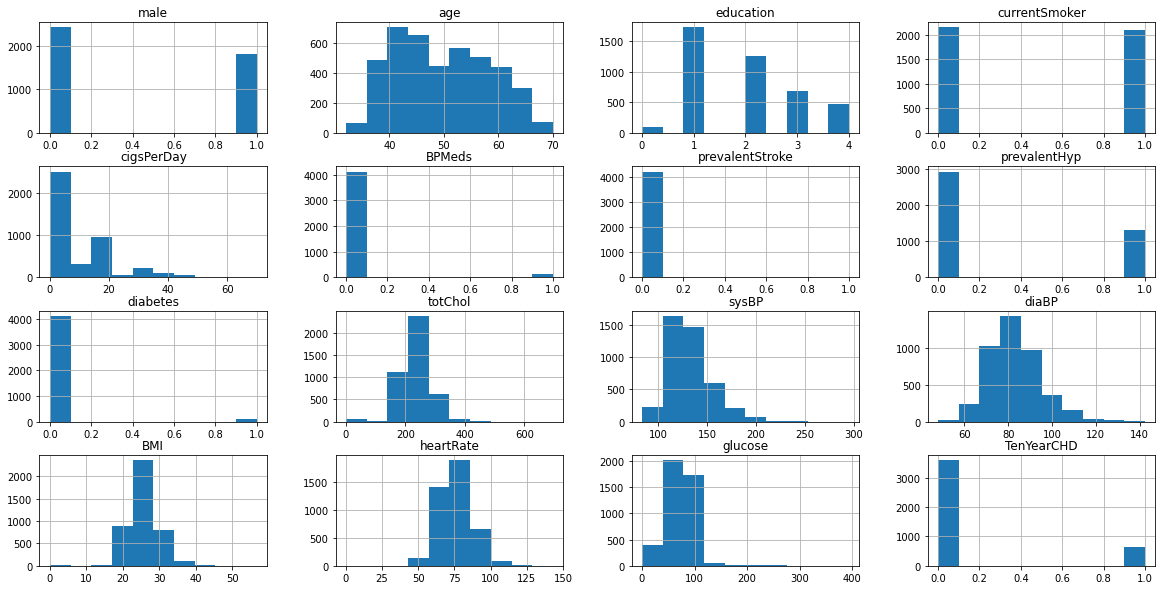

In [9]:
# plotting histograms
df.hist(figsize=(20,10))

In [10]:
df.skew()


male                0.286135
age                 0.228146
education           0.586500
currentSmoker       0.023606
cigsPerDay          1.257472
BPMeds              5.588351
prevalentStroke    12.909062
prevalentHyp        0.819278
diabetes            5.994378
totChol            -0.435123
sysBP               1.145362
diaBP               0.714102
BMI                -0.044893
heartRate           0.581529
glucose             1.462526
TenYearCHD          1.939741
dtype: float64

In [11]:
# checking for the distribution of target variable
df['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [12]:
df.columns


Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [13]:
## splitting the independent and dependent features
x=df.drop('TenYearCHD',axis=1)
y=df['TenYearCHD']

In [14]:
print(x.head())
print("\n")
print(y.head())

   male  age  education  currentSmoker  ...  diaBP    BMI  heartRate  glucose
0     1   39        4.0              0  ...   70.0  26.97       80.0     77.0
1     0   46        2.0              0  ...   81.0  28.73       95.0     76.0
2     1   48        1.0              1  ...   80.0  25.34       75.0     70.0
3     0   61        3.0              1  ...   95.0  28.58       65.0    103.0
4     0   46        3.0              1  ...   84.0  23.10       85.0     85.0

[5 rows x 15 columns]


0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64


In [15]:
# Splitting the data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(3390, 15) (3390,) (848, 15) (848,)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [18]:
lgr=LogisticRegression()
rfc=RandomForestClassifier()
svc=SVC()
knn=KNeighborsClassifier()

In [19]:
model=[lgr,rfc,svc,knn]
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("accuracy score of ",m,":")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))

accuracy score of  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) :
0.8525943396226415
[[718   6]
 [119   5]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.45      0.04      0.07       124

    accuracy                           0.85       848
   macro avg       0.66      0.52      0.50       848
weighted avg       0.80      0.85      0.80       848

accuracy score of  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, mi

In [20]:
from sklearn.model_selection import cross_val_score


In [21]:
for m in model:
    print("cross_val_score of" ,m,"is")
    scores=cross_val_score(m,x,y,cv=10)
    print(scores.mean())
    print(scores.std())

cross_val_score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is
0.8494569338507516
0.00458343588438433
cross_val_score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is
0.8492194121058031
0.005055686371416712
cros

In [22]:
from sklearn.model_selection import GridSearchCV


In [23]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2','elasticnet','none']
c= [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c)
grid_search=GridSearchCV(estimator=model,param_grid=grid,n_jobs=-1,scoring='accuracy')
grid_result=grid_search.fit(x_train,y_train)

In [24]:
print(grid_result.best_params_)
print(grid_result.best_score_)

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.8530973451327434


In [25]:
lgrbest=LogisticRegression(C=1.0, penalty='l2', solver= 'liblinear')
lgrbest.fit(x_train,y_train)
predictions=lgrbest.predict(x_test)
print(accuracy_score(y_test,predictions))

0.8584905660377359


In [26]:
input_data=(57,0,3.0,0,20.0,0,0,0,0,207.0,130,80,23.10,85,85.0)
            
# Change the input data to numpy array
input_data_np=np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped=input_data_np.reshape(1,-1)

prediction=lgrbest.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
    print("The person does not have a Heart Disease")
else:
    print("The person has Heart Disease")

[1]
The person has Heart Disease


In [27]:
import pickle


In [28]:

file=open("HD check.pkl","wb")
pickle.dump(lgrbest,file)
file.close()

In [29]:

picklefile=pickle.load(open("HD check.pkl","rb"))
pred=picklefile.predict(x_test)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 